## Friday 9

files needed = sleep75.dta, wage1.dta

This week we are working on

1. Exporting figures and tables
2. OLS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Linear regression

This notebook introduces us to the statsmodels package [(docs)](https://devdocs.io/statsmodels/), which provides functions for formulating and estimating statistical models. This notebook will not address the models, per se, but will focus on how to put econometrics to work in python.

Many of you have used STATA before. STATA is a great package for econometrics. Python can do most of what STATA can do, but STATA will have more specialized routines available. As python's popularity grows the kinds of models you can estimate in it grows, too.    

If STATA is your thing, this [page](http://rlhick.people.wm.edu/posts/comparing-stata-and-ipython-commands-for-ols-models.html) on Rob Hicks' website is a nice STATA-to-python concordance.

In [2]:
import pandas as pd                    # for data handling
import numpy as np                     # for numerical methods and data structures
import matplotlib.pyplot as plt        # for plotting


# The new package
import statsmodels.formula.api as smf  # provides a way to directly spec models from formulas

### Reading Stata data files

Jeff Wooldridge's econometrics textbooks are academic staples. Our plan today is to work through some of the problems in the Wooldridge textbook as a way to introduce regression in python. 

On the plus side, the data that correspond to the Wooldridge problems are available to download and they are **ALREADY CLEANED.** \[I contemplated adding some junk to the files to make it more interesting...\]

On the minus side, the files are in STATA's .dta format. 

Lucky for us, pandas has a method that [reads stata files](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_stata.html). It also has methods for SQL, SAS, JSON,...

In [3]:
# Use pandas read_stata method to get the stata formatted data file into a DataFrame.
sleep = pd.read_stata('sleep75.dta')

# Take a look...so clean!
sleep.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32.0,0.0,1.0,0.0,0.0,12.0,0.0,0.0,1.0,3529.0,...,0.0,3438.0,0.0,3438.0,0.0,14.0,0.0,13.0,7.070004,1024.0
1,31.0,0.0,2.0,0.0,0.0,14.0,9500.0,1.0,1.0,2140.0,...,0.0,5020.0,0.0,5020.0,0.0,11.0,0.0,0.0,1.429999,961.0
2,44.0,0.0,3.0,0.0,0.0,17.0,42500.0,1.0,1.0,4595.0,...,1.0,2815.0,0.0,2815.0,0.0,21.0,0.0,0.0,20.530001,1936.0
3,30.0,0.0,4.0,0.0,0.0,12.0,42500.0,1.0,1.0,3211.0,...,1.0,3786.0,0.0,3786.0,0.0,12.0,0.0,12.0,9.619998,900.0
4,64.0,0.0,5.0,0.0,0.0,14.0,2500.0,1.0,1.0,4052.0,...,1.0,2580.0,0.0,2580.0,0.0,44.0,0.0,33.0,2.750000,4096.0


In [4]:
# Another method for checking out a DataFrame
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 705
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       706 non-null    float32
 1   black     706 non-null    float32
 2   case      706 non-null    float32
 3   clerical  706 non-null    float32
 4   construc  706 non-null    float32
 5   educ      706 non-null    float32
 6   earns74   706 non-null    float32
 7   gdhlth    706 non-null    float32
 8   inlf      706 non-null    float32
 9   leis1     706 non-null    float32
 10  leis2     706 non-null    float32
 11  leis3     706 non-null    float32
 12  smsa      706 non-null    float32
 13  lhrwage   532 non-null    float32
 14  lothinc   706 non-null    float32
 15  male      706 non-null    float32
 16  marr      706 non-null    float32
 17  prot      706 non-null    float32
 18  rlxall    706 non-null    float32
 19  selfe     706 non-null    float32
 20  sleep     706 non-null    float3

### Specifying and estimating models with the formula.api

Consider  the regression model

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \varepsilon,$$

where $y$,  $x_1$, and $x_2$ are variables, $\beta_0, \beta_1$ and $\beta_2$ are the parameters to estimate, and $\epsilon$ is the error term. 


The `statsmodels` package provides us with a formulaic syntax for defining models that uses strings. The basic syntax is 
```
y ~ x1 + x2
```
which describes the model above. Notice that I did not specify the constant. Statsmodels takes care of that automatically.


The work flow is:
1. Specify the regression: sort out the dependent and independent variables
2. Create the model with statsmodel
3. Fit the model and obtain results

To do this, we use the `statsmodels.formula.api` methods, which we imported as `smf`. 

## 1. Specify the regression

How do hours of sleep vary with working? Do we trade off sleep for work? We control for education and age.

$$ sleep = \beta_0 + \beta_1 totwrk + \beta_2 educ + \beta_3 age + \epsilon. $$

\[This is in problem 3, chapter 3 in Wooldridge.\]

## 2. Create the model

Using the statsmodel syntax, we have 

```python
sleep ~ totwrk + educ + age
```

Remember, the constant is automatically added. 

We use the `.ols()` method of statsmodels. This is the *ordinary least squares* model. 

In [5]:
sleep_model = smf.ols('sleep ~ totwrk + educ + age', data=sleep)
type(sleep_model)

statsmodels.regression.linear_model.OLS

The `model.OLS` object contains information about the regression model. Things like:

* sleep_model.exog_names
* sleep_model.endog_names
* sleep_model.nobs

Check the documentation or try `sleep_model.` and then `TAB`. 

In [6]:
# Names of the exogenous (the right-hand side) variables in the model. 
sleep_model.exog_names

['Intercept', 'totwrk', 'educ', 'age']

## 3. Estimate the model

Step \#2 set up the model, but did not estimate the coefficients. To estimate the model, we use the `.fit()` method of the OLS model object. 

In [7]:
results = sleep_model.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

Another object! This time, a `RegressionResultsWrapper`. This object hold all the, well, results. Try `results.` and `TAB` again to see what lives in there.

In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     29.92
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           3.28e-18
Time:                        07:32:48   Log-Likelihood:                -5263.1
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     702   BIC:                         1.055e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3638.2453    112.275     32.405      0.0

Side note: Remember that in regression, we're essentially just solving a system of equations a la $Ax = B$. So, I'll also show that our results can be replicated using NumPy and some linear algebra.

If you imagine $\beta$ to be a vector $(\beta_0, \beta_1, \beta_2, \beta_3)^T$, then our data just becomes a matrix:

$$X = \begin{bmatrix} 1 & totwrk_0 & educ_0 & age_0 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & totwrk_n & educ_n & age_n \end{bmatrix}$$

So then our equation just looks like this:

\begin{align}
y &= X\beta \\
X'y &= X'X\beta \\
(X'X)^{-1} X'y &= (X'X)^{-1} X'X \beta \\
(X'X)^{-1} X'y &= \beta
\end{align}

In [9]:
# this just prevents the output from being scientific notation
np.set_printoptions(suppress=True)

In [10]:
sleep.shape

(706, 34)

In [11]:
# create the column vector (our dependent variable)
sleepy = sleep['sleep'].to_numpy()

sleepmat = np.ones((sleep.shape[0],4)) # create a matrix of ones to be our constant
sleepmat[:,1:] = sleep[['totwrk','educ','age']].to_numpy() # replace the second thru fourth columns with data
sleepmat

array([[   1., 3438.,   12.,   32.],
       [   1., 5020.,   14.,   31.],
       [   1., 2815.,   17.,   44.],
       ...,
       [   1., 1851.,   12.,   37.],
       [   1., 1961.,   17.,   54.],
       [   1., 2363.,   16.,   30.]])

In [12]:
# the @ symbol is NumPy shorthand for matrix multiplication
# Here, we're solving Ax = B as above
sleep_b = np.linalg.inv(sleepmat.T @ sleepmat) @ sleepmat.T @ sleepy
sleep_b

array([3638.24531173,   -0.14837344,  -11.13381311,    2.19988481])

In [13]:
# We can also use the lstsq command in NumPy to do this a little quicker
sleep_b_solve = np.linalg.lstsq(sleepmat, sleepy)
sleep_b_solve # lstsq returns (1) coefficients, (2) SSR, (3) matrix rank, and (4) singular values (from SVD of A)

/var/folders/59/h6mpwd8s71n4m11hd0jkp45h0000gn/T/ipykernel_18469/3600491051.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sleep_b_solve = np.linalg.lstsq(sleepmat, sleepy)


(array([3638.24531173,   -0.14837344,  -11.13381311,    2.19988481]),
 array([1.23455057e+08]),
 4,
 array([61770.92210044,   537.82689176,   115.57755235,     3.73170653]))

In [14]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     29.92
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           3.28e-18
Time:                        07:29:55   Log-Likelihood:                -5263.1
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     702   BIC:                         1.055e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3638.2453    112.275     32.405      0.0

So, we can see by comparing the three that all of them give the same results. Feel free to use whichever is most convenient to you. Back to the original work...

The more you work, the less you sleep. I feel better already.

We can retrieve individual results from the RegressionResultsWrapper object. 

In [15]:
print('The parameters are:\n', results.params, '\n')
print('The confidence intervals are:\n', results.conf_int(), '\n')
print('The r-sqared is:', results.rsquared)

The parameters are:
 Intercept    3638.245312
totwrk         -0.148373
educ          -11.133813
age             2.199885
dtype: float64 

The confidence intervals are:
                      0            1
Intercept  3417.810077  3858.680546
totwrk       -0.181149    -0.115598
educ        -22.687288     0.419661
age          -0.638561     5.038331 

The r-sqared is: 0.11336395596679805


### 1-2-3: Doing it all at once

We can chain together the three steps into one line of code. 

In [16]:
res = smf.ols('sleep ~ totwrk + educ + age', data=sleep).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     29.92
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           3.28e-18
Time:                        07:29:55   Log-Likelihood:                -5263.1
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     702   BIC:                         1.055e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3638.2453    112.275     32.405      0.0

## Transforming data

#### logs 

Logs get used a lot in econometrics. Regressing the log of a variable on the log of another variable means that the estimated coefficient is interpreted as an elasticity. 

We use the `np.log( )` method directly in the regression specification syntax. Note that we loaded the numpy package above as `np`. Let's modify our model and use the logarithm of age

$$ sleep = \beta_0 + \beta_1 totwrk + \beta_2 educ + \beta_3 \log(age)  + \epsilon. $$

The notation is 

```python
sleep ~ totwrk + educ + np.log(age)
```


In [17]:
res = smf.ols('sleep ~ totwrk + educ + np.log(age)', data=sleep).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     29.79
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           3.91e-18
Time:                        07:29:55   Log-Likelihood:                -5263.3
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     702   BIC:                         1.055e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3440.9308    239.448     14.370      

## Practice

Take a few minutes and try the following. Feel free to chat with those around you if you get stuck. I am here, too. 

Wooldridge problem C2 in chapter 6. 

1. Load wage1.dta
2. Scatter plot log(wage) against educ. There is a log-wage variable in the data already, but let's practice transforming data. Create your own log-wage variable. \[You might use `.apply()` or `.map()`\]

3. Estimate 
$$ \log(wage) = \beta_0 + \beta_1 educ + \epsilon$$

**Name your results object** `prac_results`. 

In [18]:
# 1 and 2

wage1 = pd.read_stata('wage1.dta')

# There is already a log(wage) variable in the data set (lwage) but we can always use some practice with transforms
wage1['lnwage'] = wage1['wage'].apply(np.log)

wage1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,lnwage
0,3.10,11.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.131402,4.0,0.0,1.131402
1,3.24,12.0,22.0,2.0,0.0,1.0,1.0,3.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.175573,484.0,4.0,1.175573
2,3.00,11.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.098612,4.0,0.0,1.098612
3,6.00,8.0,44.0,28.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.791759,1936.0,784.0,1.791759
4,5.30,12.0,7.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.667707,49.0,4.0,1.667707


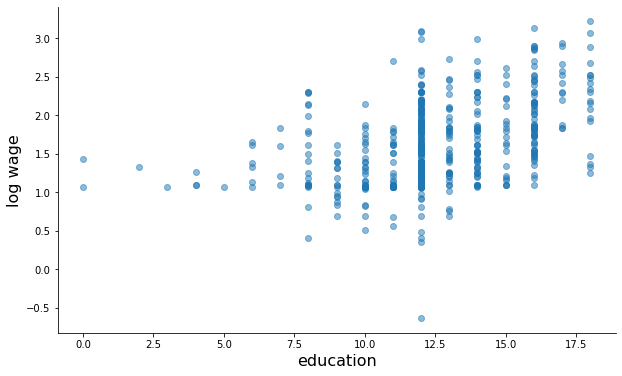

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(wage1['educ'], wage1['lnwage'], marker='o', alpha = 0.5 )

ax.set_xlabel('education', fontsize=16)
ax.set_ylabel('log wage', fontsize=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [20]:
# 3

prac_results = smf.ols('np.log(wage) ~ educ', data=wage1).fit()
print(prac_results.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           3.27e-25
Time:                        07:29:56   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.0

Shifting gears... what if we wanted to put all this into our project writeup at the end of the semester?

## Adding figures to MS Word. 

Part of your final project is an executive summary formatted as a PDF. A natural way to create the PDF is to create an MS Word document and export it as a PDF at the end. 

This means you will need to get your figures from a Jupyter notebook to an MS Word document. There are many ways to do this. The best way to do this is to first save your figure from inside your notebook, and then add it to your Word document. 

**Do not use a screenshot or the snipping tool to take a picture of the figure in your notebook and paste it into your document.** This will result in blurry figures that can be difficult to read. 

**Note from Greg**: I will also create a LaTeX template document for those who would like to create a more professional summary. Check for it at the end of the weekend if it hasn't been posted already.

Let's save our plot of education and log-wages. We will save the figure in two formats. 

The first is PNG, which is a [raster graphics](https://en.wikipedia.org/wiki/Raster_graphics) format. A raster graphic is essentially made up of many tiny dots. 

The second is SVG, which is a [scalable vector](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics) graphics format. The image is essentially a set of equations that describe the shape. 

matplotlib handles both these formats easily.

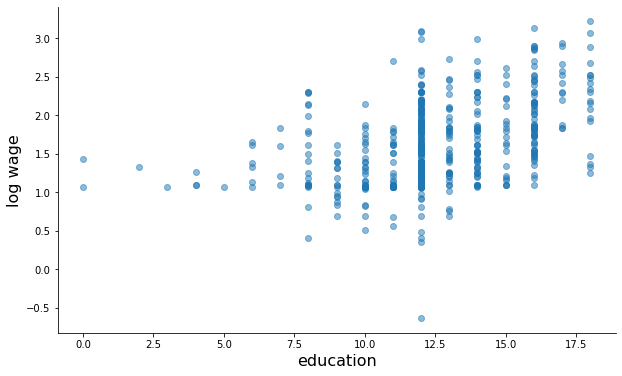

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(wage1['educ'], wage1['lnwage'], marker='o', alpha = 0.5 )

ax.set_xlabel('education', fontsize=16)
ax.set_ylabel('log wage', fontsize=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('lwage_edu.svg')
plt.savefig('lwage_edu.png')

plt.show()

### No title?

Notice that I did not add a title to the figure. This seems like malpractice. 

I did this because I will add the title in MS Word. The title is integrated into the caption and figure number object in Word. 

## Practice: Adding figures to Word

1. Open a new MS Word document. 

2. Add the two figures we created in cell above. To add a figure to Word, use the `Insert` tab at the top of the document and choose `Pictures`.

3. Add a caption. Right click on the figure and choose `Insert caption`. Set the `Label` field to `Figure`. I like my captions above the figure, but you can put them below if you choose. Make your captions consistent in their appearance and location.


### The importance of vector graphics

4. Zoom in on your document. The zoom control is in the lower-right corner. Do you see how blurry the PNG figure has become? The SVG figure scales smoothly with the figure's size. 

Be sure to use SVG files when creating your project documents. 

### Exporting regression tables

This area is less refined than exporting figures, unfortunately. Thanks to [this nice StackExchange post](https://economics.stackexchange.com/questions/11774/outputting-regressions-as-table-in-python-similar-to-outreg-in-stata), I did manage to find one solution for exporting from Python to LaTex. If you intend to use Word for your output, I would recommend using the `to_csv` command and then copy/pasting from there into a Word table as necessary.

In [22]:
print(res.summary())

beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('reg_practice.tex', 'w')
f.write(beginningtex)
f.write(res.summary().as_latex())
f.write(endtex)
f.close()

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     29.79
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           3.91e-18
Time:                        07:29:56   Log-Likelihood:                -5263.3
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     702   BIC:                         1.055e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3440.9308    239.448     14.370      

In [23]:
f = open('csv_practice.csv', 'w')
f.write(res.summary().as_csv())
f.close()